In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
scan = np.load('data/train/input/D1-100.npy')

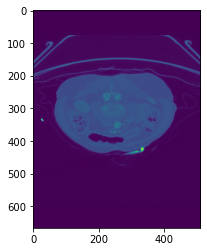

In [50]:
plt.imshow(scan)

In [51]:
scan.shape

(666, 512)

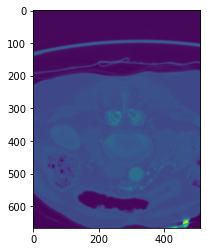

In [52]:
from scipy import ndimage as ndi

M = np.array([[0.5, 0, 100], [0, 0.5, 100], [0, 0, 1]])
img1 = ndi.affine_transform(scan, M)
plt.imshow(img1)

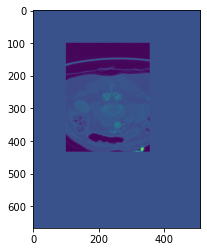

In [53]:
img1_inv = ndi.affine_transform(img1, np.linalg.inv(M))
plt.imshow(img1_inv)

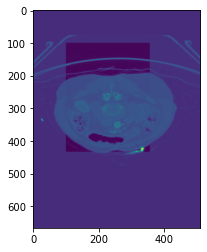

In [54]:
plt.imshow(scan + img1_inv)

In [55]:
import torch.nn.functional as F
import torch

torch.Size([1, 2, 3])


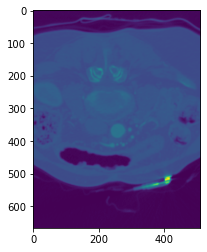

In [64]:
M = np.array([[0.5, 0, 0], [0, 0.5, 0]], dtype=np.double)
theta = torch.from_numpy(M).unsqueeze(0)
print(theta.shape)
scan_tensor = torch.from_numpy(scan).unsqueeze(0).unsqueeze(0).double()
grid = F.affine_grid(theta, scan_tensor.shape)
sampled = F.grid_sample(scan_tensor, grid)
plt.imshow(sampled.squeeze().detach().numpy())

In [133]:
theta = torch.cat((theta, theta))
print(theta)
theta_sq = torch.cat([theta, torch.Tensor([[[0, 0, 1]]] * len(theta))], 1)
print(theta_sq)

tensor([[[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0

torch.Size([1, 2, 3])


/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:4065: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:4003: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


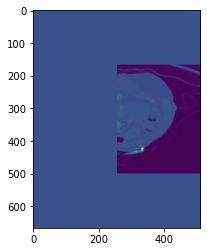

In [119]:

theta_inv = torch.linalg.inv(theta_sq)[:2].unsqueeze(0)
print(theta_inv.shape)
grid_inv = F.affine_grid(theta_inv, sampled.shape)
inverse = F.grid_sample(sampled, grid_inv)
plt.imshow(inverse.squeeze().detach().numpy())


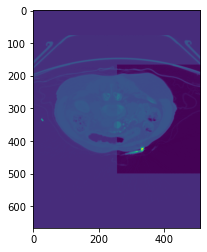

In [121]:
plt.imshow(scan + inverse.squeeze().detach().numpy())

In [25]:
import torch
tx_ty = torch.Tensor([[0.5, 0]] * 2)
print(tx_ty.shape)
tx_ty

torch.Size([2, 2])


tensor([[0.5000, 0.0000],
        [0.5000, 0.0000]])

In [46]:
test = tx_ty.view(-1, 2, 1)
test

tensor([[[0.5000],
         [0.0000]],

        [[0.5000],
         [0.0000]]])

In [34]:
scale = torch.Tensor([[0.5, 0], [0, 0.5]] * 2).reshape(2, 2, 2)
scale.shape

torch.Size([2, 2, 2])

In [45]:
theta = torch.cat((scale, test), 2)
theta

tensor([[[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]],

        [[0.5000, 0.0000, 0.5000],
         [0.0000, 0.5000, 0.0000]]])

In [4]:
test = tx_ty.unsqueeze(1)
test

tensor([[[0.5000, 0.0000]]])

In [8]:
test = test.expand(1, 3, 2)

RuntimeError: The expanded size of the tensor (3) must match the existing size (2) at non-singleton dimension 2.  Target sizes: [1, 1, 3].  Tensor sizes: [1, 1, 2]